## Frequency of Stock Name In Sub reddit - Wall Street Bets, for the last 7 days

Importing the Libraries

In [1]:
from psaw import PushshiftAPI
import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
api = PushshiftAPI()

Getting all titles of subreddit wallstreetbetsfor the past seven days and saving it in l1

In [3]:
l1 = []
start_time = int((dt.datetime.today()+timedelta(-7)).timestamp())
a = list(api.search_submissions(after=start_time,subreddit="wallstreetbets",filter=['url','author','title']))
b = list(api.search_submissions(after=start_time,subreddit="investing",filter=['url','author','title']))
c = list(api.search_submissions(after=start_time,subreddit="pennystocks",filter=['url','author','title']))
d = list(api.search_submissions(after=start_time,subreddit="weedstocks",filter=['url','author','title']))
e = list(api.search_submissions(after=start_time,subreddit="StockMarket",filter=['url','author','title']))
f = list(api.search_submissions(after=start_time,subreddit="Trading",filter=['url','author','title']))
g = list(api.search_submissions(after=start_time,subreddit="Daytrading",filter=['url','author','title']))

In [4]:
import itertools
submission = itertools.chain(a,b,c,d,e,f,g)
submission = list(submission)

In [5]:
submission

[submission(author='parkjihyun619', created_utc=1616001381, title='added 10 shares of GME, let’s go!!! 🚀🚀🚀', url='https://i.redd.it/ovqzz5r9gmn61.jpg', created=1615981581.0, d_={'author': 'parkjihyun619', 'created_utc': 1616001381, 'title': 'added 10 shares of GME, let’s go!!! 🚀🚀🚀', 'url': 'https://i.redd.it/ovqzz5r9gmn61.jpg', 'created': 1615981581.0}),
 submission(author='TurdsforNipples', created_utc=1616001376, title='AMC tweet - keep your friends close, but your chicken tenders closer', url='https://mobile.twitter.com/AMCTheatres/status/1372231255824203778?s=20', created=1615981576.0, d_={'author': 'TurdsforNipples', 'created_utc': 1616001376, 'title': 'AMC tweet - keep your friends close, but your chicken tenders closer', 'url': 'https://mobile.twitter.com/AMCTheatres/status/1372231255824203778?s=20', 'created': 1615981576.0}),
 submission(author='Xientziunjo', created_utc=1616001366, title='Dfv tweet - if we wanna make money we need to create momentum! Buy!!! 🚀🚀🚀', url='https://

In [6]:
for sub in submission:
    words = sub.title.split()
    for characters in words:
        l1.append(characters)

In [7]:
data = pd.DataFrame(l1)

Getting the list of words from all the posts on the sub reddit

In [8]:
data

,0
0,added
1,10
2,shares
3,of
4,"GME,"
...,...
169377,rate
169378,does
169379,not
169380,equal


Checking if the words in l1 contains dollar sign which indicates a ticker name

In [9]:
l2 = []
isalpha = False
for name in l1:
    if name.startswith("$"):
        temp = 1
        i = temp
        for k in range(len(name)):
            try:
                if name[i].isalpha():
                    i += 1
                else:
                    temp += 1
                    i = temp
            except IndexError:
                if i==len(name):
                    l2.append(name[temp:])
                else:
                    l2.append(name[temp:i])
                continue
l3 = list(set(filter(lambda p: len(p)>0,l2)))           

In [10]:
l3

['XELA',
 'ALYI',
 'SENS',
 'unfi',
 'SKDI',
 'LUNA',
 'RMLFF',
 'AAPL',
 'WLLW',
 'ASRT',
 'ATDS',
 'CLDR',
 'MEDXF',
 'Pdao',
 'PPJE',
 'LAZR',
 'TRYP',
 'cdev',
 'RIOT',
 'RXMD',
 'HUYA',
 'GIK',
 'CBD',
 'CLPS',
 'ASDN',
 'HSSHF',
 'AABB',
 'EURN',
 'SFET',
 'VBHI',
 'TSLA',
 'Rkt',
 'DISCA',
 'CBSC',
 'AVGO',
 'OUST',
 'LTNC',
 'ENTX',
 'GSFI',
 'NWGC',
 'INTK',
 'HALB',
 'CANSF',
 'HITI',
 'COVD',
 'COMS',
 'GTE',
 'IRDM',
 'CHEK',
 'BXRX',
 'DLCR',
 'OCGN',
 'GOGO',
 'CCIV',
 'EXPE',
 'DOC',
 'bn',
 'KMPH',
 'seel',
 'ACGX',
 'TLRY',
 'SNGX',
 'LPCN',
 'GUSH',
 'MRNA',
 'AI',
 'W',
 'METX',
 'PTTN',
 'BN',
 'PPTN',
 'wpg',
 'ICNM',
 'FBDL',
 'VLNCF',
 'CCTL',
 'BBBY',
 'WPM',
 'PROM',
 'SNDL',
 'VLNS',
 'SPRWF',
 'GAYMF',
 'two',
 'GBHL',
 'f',
 'EVFM',
 'NXPI',
 'gme',
 'IMTL',
 'GPFT',
 'SKT',
 'FLNT',
 'INVU',
 'MAC',
 'AREC',
 'SBFM',
 'NKLA',
 'SKLZ',
 'FMCC',
 'hmbl',
 'TRISM',
 'LTBR',
 'Aumn',
 'FTCV',
 'Zest',
 'DNN',
 'SESN',
 'chpt',
 'CTSO',
 'PCP',
 'GCLT',
 'NDTP',

Checking if the words in l3 are stock tickers and saving the confirmed tickers in l4

In [11]:
start = dt.datetime.today() + timedelta(-7)
end = dt.datetime.today()
l4 = []
for name in l3:
    if name.upper() not in l4:
        temp = name.upper()
        ticker = yf.Ticker(temp)
        training_data= ticker.history(start=start,end=end,interval='5m')
        if len(training_data)>0:
            l4.append(temp)
    else:
        l4.append(name.upper())

- WLLW: No data found, symbol may be delisted
- PDAO: No data found, symbol may be delisted
- TRYP: No data found, symbol may be delisted
- HITI: No data found, symbol may be delisted
- COVD: No data found for this date range, symbol may be delisted
- BN: No data found for this date range, symbol may be delisted
- BN: No data found for this date range, symbol may be delisted
- PPTN: No data found, symbol may be delisted
- FBDL: No data found, symbol may be delisted
- VLNS: No data found, symbol may be delisted
- HMBL: No data found, symbol may be delisted
- TRISM: No data found, symbol may be delisted
- PCP: No data found for this date range, symbol may be delisted
- ASS: No data found for this date range, symbol may be delisted
- GAMESTOP: No data found, symbol may be delisted
- EINFELD: No data found, symbol may be delisted
- APPL: No data found for this date range, symbol may be delisted
- FEG: No data found for this date range, symbol may be delisted
- BRRRR: No data found, symbol 

In [12]:
d1 = dict()
for i in l4:
    if  i in d1.keys():
        d1[i] += 1
    else:
        d1[i] = 1

In [13]:
d1

{'XELA': 1,
 'ALYI': 1,
 'SENS': 1,
 'UNFI': 1,
 'SKDI': 1,
 'LUNA': 1,
 'RMLFF': 1,
 'AAPL': 1,
 'ASRT': 1,
 'ATDS': 1,
 'CLDR': 1,
 'MEDXF': 1,
 'PPJE': 1,
 'LAZR': 1,
 'CDEV': 1,
 'RIOT': 2,
 'RXMD': 1,
 'HUYA': 1,
 'GIK': 1,
 'CBD': 1,
 'CLPS': 1,
 'ASDN': 1,
 'HSSHF': 1,
 'AABB': 1,
 'EURN': 1,
 'SFET': 1,
 'VBHI': 1,
 'TSLA': 1,
 'RKT': 3,
 'DISCA': 1,
 'CBSC': 1,
 'AVGO': 1,
 'OUST': 1,
 'LTNC': 1,
 'ENTX': 1,
 'GSFI': 1,
 'NWGC': 1,
 'INTK': 1,
 'HALB': 1,
 'CANSF': 1,
 'COMS': 1,
 'GTE': 1,
 'IRDM': 1,
 'CHEK': 2,
 'BXRX': 1,
 'DLCR': 1,
 'OCGN': 1,
 'GOGO': 1,
 'CCIV': 2,
 'EXPE': 1,
 'DOC': 1,
 'KMPH': 2,
 'SEEL': 2,
 'ACGX': 1,
 'TLRY': 1,
 'SNGX': 1,
 'LPCN': 1,
 'GUSH': 1,
 'MRNA': 1,
 'AI': 1,
 'W': 1,
 'METX': 1,
 'PTTN': 1,
 'WPG': 1,
 'ICNM': 1,
 'VLNCF': 1,
 'CCTL': 1,
 'BBBY': 1,
 'WPM': 1,
 'PROM': 1,
 'SNDL': 1,
 'SPRWF': 1,
 'GAYMF': 1,
 'TWO': 2,
 'GBHL': 1,
 'F': 2,
 'EVFM': 1,
 'NXPI': 1,
 'GME': 3,
 'IMTL': 1,
 'GPFT': 1,
 'SKT': 1,
 'FLNT': 1,
 'INVU': 1,
 '

In [14]:
df = pd.DataFrame(list(d1.items()),columns = ['Ticker','Freq'])

In [15]:
df

,Ticker,Freq
0,XELA,1
1,ALYI,1
2,SENS,1
3,UNFI,1
4,SKDI,1
...,...,...
394,GHMP,1
395,EEENF,1
396,APYP,1
397,AGYP,1


In [16]:
df.sort_values(by=['Freq'], inplace=True,ascending=False)

In [17]:
df

,Ticker,Freq
28,RKT,3
101,NOK,3
78,GME,3
236,AMC,3
52,SEEL,2
...,...,...
137,TSOI,1
136,EYES,1
135,SANP,1
134,PSWW,1


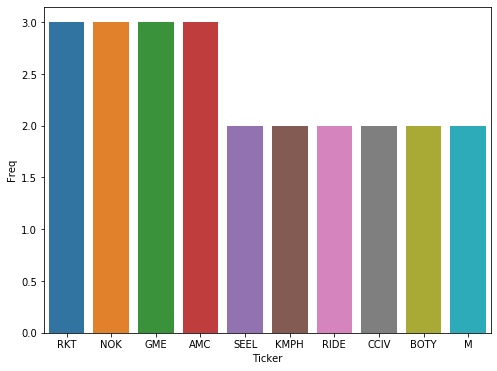

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df['Ticker'].head(10) , y = df['Freq'])

In [19]:
stocks = df['Ticker']

In [20]:
stocks = stocks.values.tolist()

In [21]:
stocks

['RKT',
 'NOK',
 'GME',
 'AMC',
 'SEEL',
 'KMPH',
 'RIDE',
 'CCIV',
 'BOTY',
 'M',
 'F',
 'ROOT',
 'NOC',
 'GNUS',
 'CHEK',
 'PLTR',
 'TWO',
 'MJNA',
 'OZSC',
 'HPMM',
 'RIOT',
 'EXPR',
 'GPRO',
 'C',
 'K',
 'HCMC',
 'HMNY',
 'IGN',
 'BIOC',
 'ICAD',
 'WATT',
 'GEGR',
 'GSAT',
 'FUNFF',
 'RGGI',
 'SLGG',
 'NXGWF',
 'JAMN',
 'DIRV',
 'XELA',
 'NSPR',
 'SUMO',
 'HIMS',
 'SSY',
 'CTRM',
 'IPNFF',
 'GTVH',
 'USRM',
 'NAKD',
 'XALL',
 'OKTA',
 'DROP',
 'UBA',
 'GSV',
 'OBLN',
 'AHPI',
 'GPORQ',
 'ERIC',
 'INKW',
 'LOAC',
 'OR',
 'VFF',
 'WWR',
 'VALE',
 'RLFTF',
 'SODE',
 'XXII',
 'CYDY',
 'CPNG',
 'ZKIN',
 'FAMI',
 'CLOV',
 'BCRX',
 'INVO',
 'DBKSF',
 'SYN',
 'SMCE',
 'BTCS',
 'KR',
 'AZRX',
 'CTXR',
 'GHAV',
 'NGA',
 'JBL',
 'AZFL',
 'VBIV',
 'CETY',
 'TR',
 'TKAT',
 'HEPA',
 'MAXD',
 'ONTX',
 'IPOE',
 'SONO',
 'BLIAQ',
 'NAK',
 'MSNVF',
 'REV',
 'DT',
 'TMUS',
 'FNMA',
 'AAU',
 'CRSR',
 'BA',
 'CAN',
 'AVEO',
 'RMTI',
 'LKCO',
 'TMBR',
 'BABA',
 'GRWG',
 'AMD',
 'JNJ',
 'AYTU',
 'IDEX',


## Sentiment analysis on Reddit post

In [22]:
import praw

In [23]:
reddit = praw.Reddit(client_id='TbjqjkOuouPbbw', 
                     client_secret='O6tRQ7QyGvC5qqTj6RAzVba5B1Eejg', 
                     user_agent='Pranav')

In [24]:
def commentSentiment(ticker, urlT):
    subComments = []
    bodyComment = []
    try:
        check = reddit.submission(url=urlT)
        subComments = check.comments #obtain sub comments, add into Array
    except:
        return 0
    
    for comment in subComments:
        try: 
            bodyComment.append(comment.body) #obtain body only
        except:
            return 0
    
    sia = SIA()
    results = []
    for line in bodyComment:
        scores = sia.polarity_scores(line) #analyse sentiment, +ve score are positive valence, -ve score negative valence
        scores['headline'] = line

        results.append(scores)
    
    df =pd.DataFrame.from_records(results) #convert to pandas DF
    df.head()
    df['label'] = 0
    
    try:
        df.loc[df['compound'] > 0.1, 'label'] = 1
        df.loc[df['compound'] < -0.1, 'label'] = -1
    except:
        return 0
    
    averageScore = 0
    position = 0
    
    #calculate average score 
    
    while position < len(df.label)-1:
        averageScore = averageScore + df.label[position]
        position += 1
    averageScore = averageScore/len(df.label) 
    
    return(averageScore)

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [26]:
def get_date(date):
    return dt.datetime.fromtimestamp(date)

In [27]:
submission_statistics = []
d = {}

for ticker in stocks:
    for submission in reddit.subreddit('wallstreetbets').search(ticker, limit= 5):
        if submission.domain != "self.wallstreetbets":
            continue
        d = {}
        d['Ticker'] = ticker
        d['num_comments'] = submission.num_comments
        d['comment_sentiment_average'] = commentSentiment(ticker, submission.url)
        if d['comment_sentiment_average'] == 0.000000:
            continue
        d['score'] = submission.score
        d['upvote_ratio'] = submission.upvote_ratio
        d['date'] = submission.created_utc
        d['domain'] = submission.domain
        d['author'] = submission.author
        submission_statistics.append(d)

    
dfSentimentStocks = pd.DataFrame(submission_statistics)

_timestampcreated = dfSentimentStocks["date"].apply(get_date)
dfSentimentStocks = dfSentimentStocks.assign(timestamp = _timestampcreated)

dfSentimentStocks

,Ticker,num_comments,comment_sentiment_average,score,upvote_ratio,date,domain,author,timestamp
0,RIDE,120,0.057143,41,0.64,1.616265e+09,self.wallstreetbets,JikeMordan,2021-03-21 00:06:56
1,RIDE,77,0.058824,6,0.58,1.616294e+09,self.wallstreetbets,heyfuBABZ,2021-03-21 08:06:02
2,RIDE,16,0.444444,35,0.72,1.616270e+09,self.wallstreetbets,plz-be-nice-to-me,2021-03-21 01:24:26
3,CCIV,398,0.028571,691,0.86,1.610468e+09,self.wallstreetbets,TheExecutiveBathroom,2021-01-12 21:49:28
4,CCIV,190,0.210526,263,0.93,1.610402e+09,self.wallstreetbets,Andrewskeeter,2021-01-12 03:16:32
...,...,...,...,...,...,...,...,...,...
598,MMS,67,0.206897,145,0.95,1.612030e+09,self.wallstreetbets,absoluteScientific,2021-01-30 23:33:11
599,MMS,22,-0.058824,149,0.96,1.612285e+09,self.wallstreetbets,ScaredofWhispers,2021-02-02 22:29:52
600,SPCX,27,0.250000,22,0.74,1.610834e+09,self.wallstreetbets,anonchurner,2021-01-17 03:29:53
601,SPCX,22,0.200000,6,0.60,1.487521e+09,self.wallstreetbets,xXTheCitrusReaperXx,2017-02-19 21:42:30


In [28]:
grouped = dfSentimentStocks.groupby('Ticker')

In [29]:
newdf =  grouped['comment_sentiment_average'].agg(np.mean)

In [30]:
newdf

Ticker
AAL     0.168026
AAPL    0.340385
ACB     0.075000
ACER   -0.111538
ADMP    0.173611
          ...   
XXII    0.119560
ZKIN    0.500000
ZOM     0.326047
ZSAN    0.500000
ZTO     0.039683
Name: comment_sentiment_average, Length: 236, dtype: float64

In [31]:
newdf = pd.DataFrame(newdf)

In [32]:
newdf 

,comment_sentiment_average
Ticker,
AAL,0.168026
AAPL,0.340385
ACB,0.075000
ACER,-0.111538
ADMP,0.173611
...,...
XXII,0.119560
ZKIN,0.500000
ZOM,0.326047


In [33]:
op = pd.merge(newdf,df, on="Ticker")

In [34]:
op

,Ticker,comment_sentiment_average,Freq
0,AAL,0.168026,1
1,AAPL,0.340385,1
2,ACB,0.075000,1
3,ACER,-0.111538,1
4,ADMP,0.173611,1
...,...,...,...
231,XXII,0.119560,1
232,ZKIN,0.500000,1
233,ZOM,0.326047,1
234,ZSAN,0.500000,1


In [35]:
op['Score'] = op['comment_sentiment_average']*op['Freq']

In [36]:
op

,Ticker,comment_sentiment_average,Freq,Score
0,AAL,0.168026,1,0.168026
1,AAPL,0.340385,1,0.340385
2,ACB,0.075000,1,0.075000
3,ACER,-0.111538,1,-0.111538
4,ADMP,0.173611,1,0.173611
...,...,...,...,...
231,XXII,0.119560,1,0.119560
232,ZKIN,0.500000,1,0.500000
233,ZOM,0.326047,1,0.326047
234,ZSAN,0.500000,1,0.500000


## Finviz

In [37]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [38]:
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
stonks = ['TSLA','NVDA','MA','ROKU','ZM','HD','BRK-B','FB','BIDU','MSFT','BABA','PYPL','BA','V',
'SNOW','CRM','SE','DIS','SQ','GME','CRWD','JNJ','JPM','FIS','PDD','DASH','PEP','WMT','PG','TMUS','IBM','Z','MRNA','QCOM','FUTU','FISV','AAPL','TSM','CVX','ABBV',
'AMAT','SBUX','PTON','BILI','U','ATVI','GSX','JD','MU','AI','VIAC','MS','DDOG','RTX','EOG','MRK','AMD','C','ORCL','D','CVS','NEE','WDC','TAL','DISCA','TJX','GILD','SCHW',
'LYFT','TWTR','LVS','PINS','FSLY','XEL','APPS','NET','XOM','LUV','DKNG','BMY','MET','JCI','INTC','TFC','SO','COP','AER','MPC','VZ','NEM','IP','CMCSA','MDLZ','DISCK','GM','UAL',
'USB','FTCH','EBAY']
for ticker in stonks:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [39]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [40]:
parsed_data

[['TSLA',
  'Mar-20-21',
  '04:09PM\xa0\xa0',
  'Cathie Wood, Ark Funds Lay Out New $3,000 Price Target For Tesla Shares: What Investors Should Know'],
 ['TSLA',
  'Mar-20-21',
  '03:01PM\xa0\xa0',
  'Cathie Woods Ark Has a New Price Target for Tesla: $3,000'],
 ['TSLA',
  'Mar-20-21',
  '01:17PM\xa0\xa0',
  'Report: In Direct Challenge to Tesla, Geely Planning Luxury Electric Vehicle Line'],
 ['TSLA',
  'Mar-20-21',
  '01:16PM\xa0\xa0',
  'He began buying Tesla at just $7.50, and now hes retiring at 39 years old with $12 million worth  he still refuses to sell a single share'],
 ['TSLA',
  'Mar-20-21',
  '11:03AM\xa0\xa0',
  'China Matters a Lot to Tesla. Thats Why Elon Musk Has Given Assurances About Its Data.'],
 ['TSLA',
  'Mar-20-21',
  '10:55AM\xa0\xa0',
  "Musk Says Tesla Would Be 'Shut Down' If Its Cars Were Used To Spy In China"],
 ['TSLA',
  'Mar-20-21',
  '10:37AM\xa0\xa0',
  'Cathie Woods New Tesla Price Target Is Out. And Its a Doozy.'],
 ['TSLA',
  'Mar-20-21',
  '10:03AM

In [100]:
x = pd.DataFrame(parsed_data, columns=['ticker',"date", 'time', 'title'])
x['date'] = pd.to_datetime(x.date).dt.date

In [101]:
import nltk
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
x['compound'] = x['title'].apply(f)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [102]:
x

,ticker,date,time,title,compound
0,TSLA,2021-03-20,04:09PM,"Cathie Wood, Ark Funds Lay Out New $3,000 Pric...",0.2960
1,TSLA,2021-03-20,03:01PM,Cathie Woods Ark Has a New Price Target for Te...,0.0000
2,TSLA,2021-03-20,01:17PM,"Report: In Direct Challenge to Tesla, Geely Pl...",0.0772
3,TSLA,2021-03-20,01:16PM,"He began buying Tesla at just $7.50, and now h...",0.4767
4,TSLA,2021-03-20,11:03AM,China Matters a Lot to Tesla. Thats Why Elon M...,0.3612
...,...,...,...,...,...
9852,EBAY,2021-02-02,11:07AM,Dow Jumps as Banks Rally; GameStop Short-Squee...,0.0000
9853,EBAY,2021-02-02,08:56AM,Dow Rallies as Cyclicals Shine; GameStop Loses...,-0.3182
9854,EBAY,2021-02-01,11:09AM,Dow Rallies as Bulls Back Tech; Silver the New...,0.0000
9855,EBAY,2021-02-01,09:20AM,E-commerce Stock Q4 Earnings Roster This Week:...,0.0000


In [94]:
start = dt.date.today() +timedelta(-7)

In [96]:
end = dt.date.today() 

In [103]:
mask = (x['date'] > start) & (x['date'] <= end)    

In [104]:
x = x.loc[mask]

In [105]:
x

,ticker,date,time,title,compound
0,TSLA,2021-03-20,04:09PM,"Cathie Wood, Ark Funds Lay Out New $3,000 Pric...",0.2960
1,TSLA,2021-03-20,03:01PM,Cathie Woods Ark Has a New Price Target for Te...,0.0000
2,TSLA,2021-03-20,01:17PM,"Report: In Direct Challenge to Tesla, Geely Pl...",0.0772
3,TSLA,2021-03-20,01:16PM,"He began buying Tesla at just $7.50, and now h...",0.4767
4,TSLA,2021-03-20,11:03AM,China Matters a Lot to Tesla. Thats Why Elon M...,0.3612
...,...,...,...,...,...
9759,EBAY,2021-03-16,04:43AM,"SK Telecom, Shinsegae Group among bidders for ...",0.0000
9760,EBAY,2021-03-16,04:35AM,"UPDATE 1-SK Telecom, Shinsegae Group among bid...",0.0000
9761,EBAY,2021-03-15,03:00PM,2022 expected to be first year the U.S. will s...,0.0000
9762,EBAY,2021-03-15,02:54PM,2022 expected to be first year the U.S. will s...,0.0000


In [106]:
xgrouped = x.groupby('ticker')

In [107]:
newdfx =  xgrouped['compound'].agg(np.mean)

In [108]:
newdfx

ticker
AAPL    0.063335
ABBV    0.008113
AER    -0.069288
AMAT    0.048437
AMD     0.115243
          ...   
WMT     0.214409
XEL     0.636900
XOM     0.010466
Z       0.154275
ZM      0.181877
Name: compound, Length: 96, dtype: float64

In [109]:
newdfx = pd.DataFrame(newdfx)

In [110]:
newdfx

,compound
ticker,
AAPL,0.063335
ABBV,0.008113
AER,-0.069288
AMAT,0.048437
AMD,0.115243
...,...
WMT,0.214409
XEL,0.636900
XOM,0.010466


In [111]:
xmean_df = x.groupby(['ticker', 'date']).mean()

In [112]:
xmean_df

compound
ticker date                
AAPL   2021-03-16 -0.056467
       2021-03-17  0.102058
       2021-03-18  0.177409
       2021-03-19 -0.039889
       2021-03-20  0.024669
...                     ...
ZM     2021-03-16  0.225086
       2021-03-17 -0.435500
       2021-03-18  0.301850
       2021-03-19  0.224500
       2021-03-20  0.075433

[421 rows x 1 columns]

In [113]:
result = newdf.append(newdfx, sort=False)

In [114]:
result

,comment_sentiment_average,compound
AAL,0.168026,NaN
AAPL,0.340385,NaN
ACB,0.075000,NaN
ACER,-0.111538,NaN
ADMP,0.173611,NaN
...,...,...
WMT,NaN,0.214409
XEL,NaN,0.636900
XOM,NaN,0.010466
Z,NaN,0.154275


In [115]:
result['comment_sentiment_average'] = result['comment_sentiment_average'].fillna(0)
result['compound'] = result['compound'].fillna(0)

In [116]:
result['final_score'] = result['comment_sentiment_average']+ result['compound']

In [117]:
result['final_score']

AAL     0.168026
AAPL    0.340385
ACB     0.075000
ACER   -0.111538
ADMP    0.173611
          ...   
WMT     0.214409
XEL     0.636900
XOM     0.010466
Z       0.154275
ZM      0.181877
Name: final_score, Length: 332, dtype: float64

In [121]:
finalop = pd.DataFrame(result['final_score'])

In [122]:
finalop

,final_score
AAL,0.168026
AAPL,0.340385
ACB,0.075000
ACER,-0.111538
ADMP,0.173611
...,...
WMT,0.214409
XEL,0.636900
XOM,0.010466
Z,0.154275
